In [1329]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import make_scorer, confusion_matrix, classification_report,  roc_auc_score

from sklearn import metrics
import seaborn as sns #Data Visualisation, used for displaying  statistical graphs
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV #Used for Training & Testing and Tuning
#import SMOTE 
import sklearn.neighbors



%matplotlib inline



In [1330]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape

(5110, 12)

In [1331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [1332]:
# how many null values exist is checked
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1333]:
df.nunique()


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

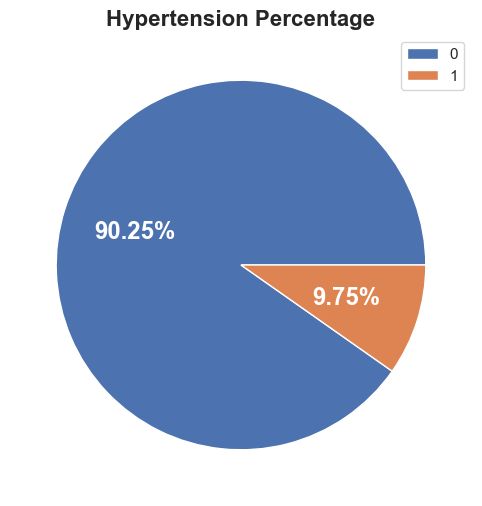

0    4612
1     498
Name: hypertension, dtype: int64

In [1334]:
plt.figure(figsize = (8, 6))
plt.pie(pd.value_counts(df['hypertension']), 
        labels = [0,1],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Hypertension Percentage', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['hypertension'])

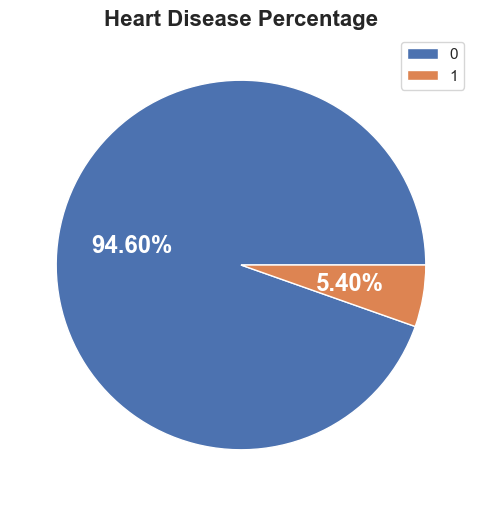

0    4834
1     276
Name: heart_disease, dtype: int64

In [1335]:
plt.figure(figsize = (8, 6))
plt.pie(pd.value_counts(df['heart_disease']),
        labels = [0,1],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Heart Disease Percentage', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['heart_disease'])


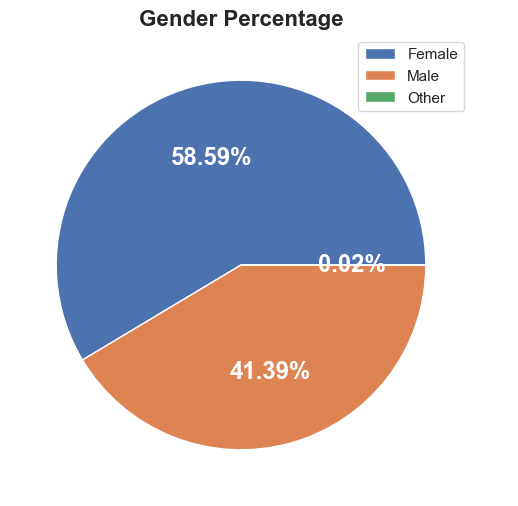

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [1336]:
plt.figure(figsize = (8, 6))
plt.pie(pd.value_counts(df['gender']), 
        labels = ['Female', 'Male', 'Other'],
        autopct = '%.2f%%', # enables you to display the percent value using Python string formatting
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',                     
                     'color' : 'w'})

plt.legend() # shows genders according to colour
plt.title('Gender Percentage', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['gender'])

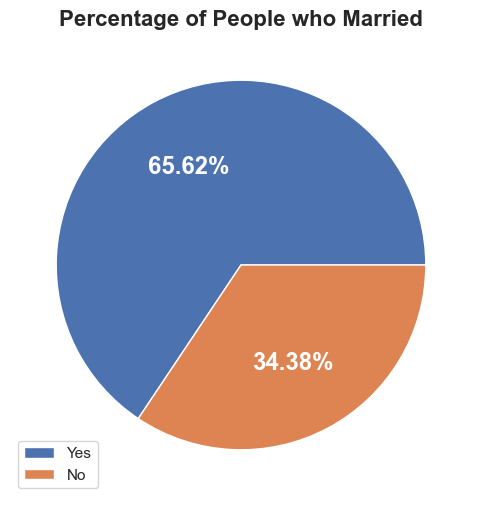

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [1337]:
plt.figure(figsize = (8, 6))
plt.pie(pd.value_counts(df['ever_married']), 
        labels = ['Yes', 'No'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of People who Married', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['ever_married'])

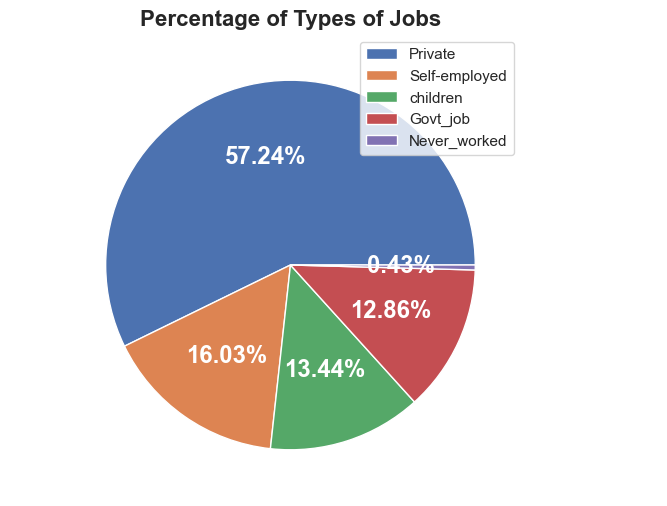

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [1338]:
plt.figure(figsize = (8, 6))
plt.pie(pd.value_counts(df['work_type']), 
        labels = ['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of Types of Jobs', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['work_type'])

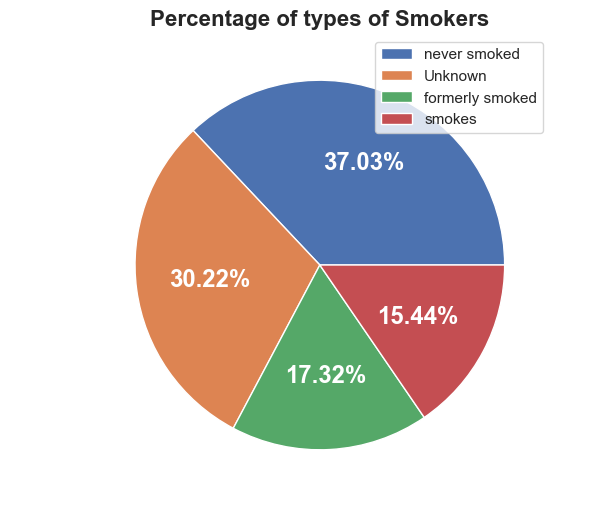

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [1339]:
plt.figure(figsize = (8, 6))
plt.pie(pd.value_counts(df['smoking_status']), 
        labels = ['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of types of Smokers', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['smoking_status'])

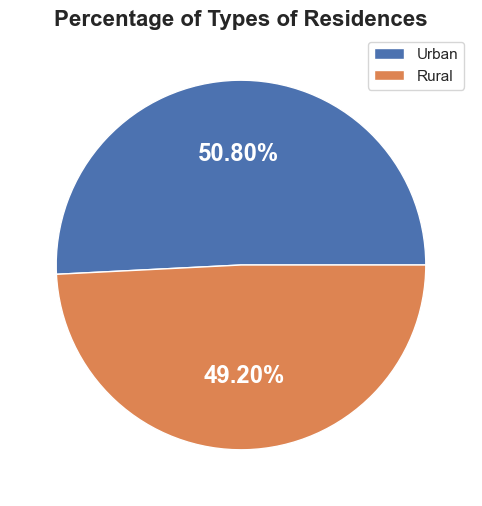

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [1340]:
plt.figure(figsize = (8 ,6))
plt.pie(pd.value_counts(df['Residence_type']), 
        labels = ['Urban', 'Rural'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of Types of Residences', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['Residence_type'])

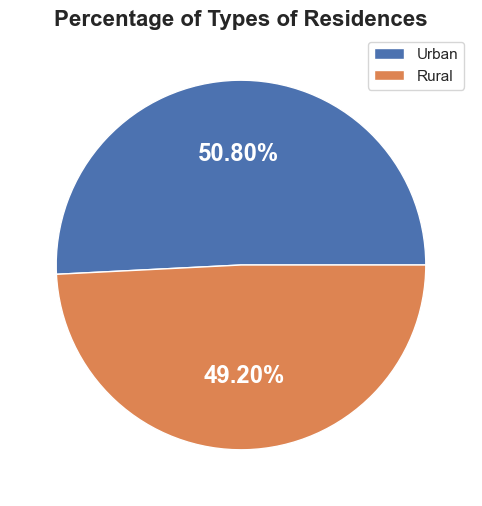

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [1341]:
plt.figure(figsize = (8 ,6))
plt.pie(pd.value_counts(df['Residence_type']), 
        labels = ['Urban', 'Rural'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of Types of Residences', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['Residence_type'])

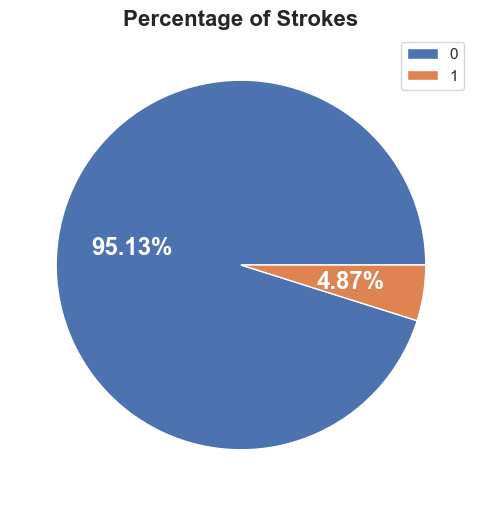

0    4861
1     249
Name: stroke, dtype: int64

In [1342]:
plt.figure(figsize = (8 ,6))
plt.pie(pd.value_counts(df['stroke']), 
        labels = ['0', '1'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of Strokes', fontsize = 16, fontweight = 'bold')
plt.show()
pd.value_counts(df['stroke'])

In [1343]:
df[df["gender"]=="Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [1344]:
# removed other gender as it serves no purpose in predicting stroke and is the only value in this dataset
df=df.drop(3116,axis=0)

df.iloc[3114:3118,:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,67032,Male,42.0,0,0,No,Govt_job,Urban,115.21,28.7,Unknown,0
3115,39784,Female,72.0,0,0,Yes,Self-employed,Urban,65.12,28.3,never smoked,0
3117,15230,Female,9.0,0,0,No,children,Rural,80.55,15.1,Unknown,0
3118,25218,Female,31.0,0,0,Yes,Govt_job,Urban,88.20,22.7,never smoked,0


In [1345]:
index=[i for i in range(df.shape[0])]
df.index=index
df.iloc[3114:3118,:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,67032,Male,42.0,0,0,No,Govt_job,Urban,115.21,28.7,Unknown,0
3115,39784,Female,72.0,0,0,Yes,Self-employed,Urban,65.12,28.3,never smoked,0
3116,15230,Female,9.0,0,0,No,children,Rural,80.55,15.1,Unknown,0
3117,25218,Female,31.0,0,0,Yes,Govt_job,Urban,88.20,22.7,never smoked,0


In [1346]:
df.iloc[3114:3118,:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,67032,Male,42.0,0,0,No,Govt_job,Urban,115.21,28.7,Unknown,0
3115,39784,Female,72.0,0,0,Yes,Self-employed,Urban,65.12,28.3,never smoked,0
3116,15230,Female,9.0,0,0,No,children,Rural,80.55,15.1,Unknown,0
3117,25218,Female,31.0,0,0,Yes,Govt_job,Urban,88.20,22.7,never smoked,0


In [1347]:
# how many null values exist is checked
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1348]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [1349]:
bmiavg = df['bmi'].mean()
bmiavg 

28.894559902200488

In [1350]:
df.bmi=(df.bmi.fillna(bmiavg))
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [1351]:
df.isnull().sum()
# any null values existing? 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [1352]:
# checking the percentage of people who were affected by a stroke and who weren't 
strk = 'stroke'
pd.crosstab(df[strk], columns = 'Normalized', normalize = True)

col_0,Normalized
stroke,
0,0.951262
1,0.048738


c:\Python392\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Python392\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


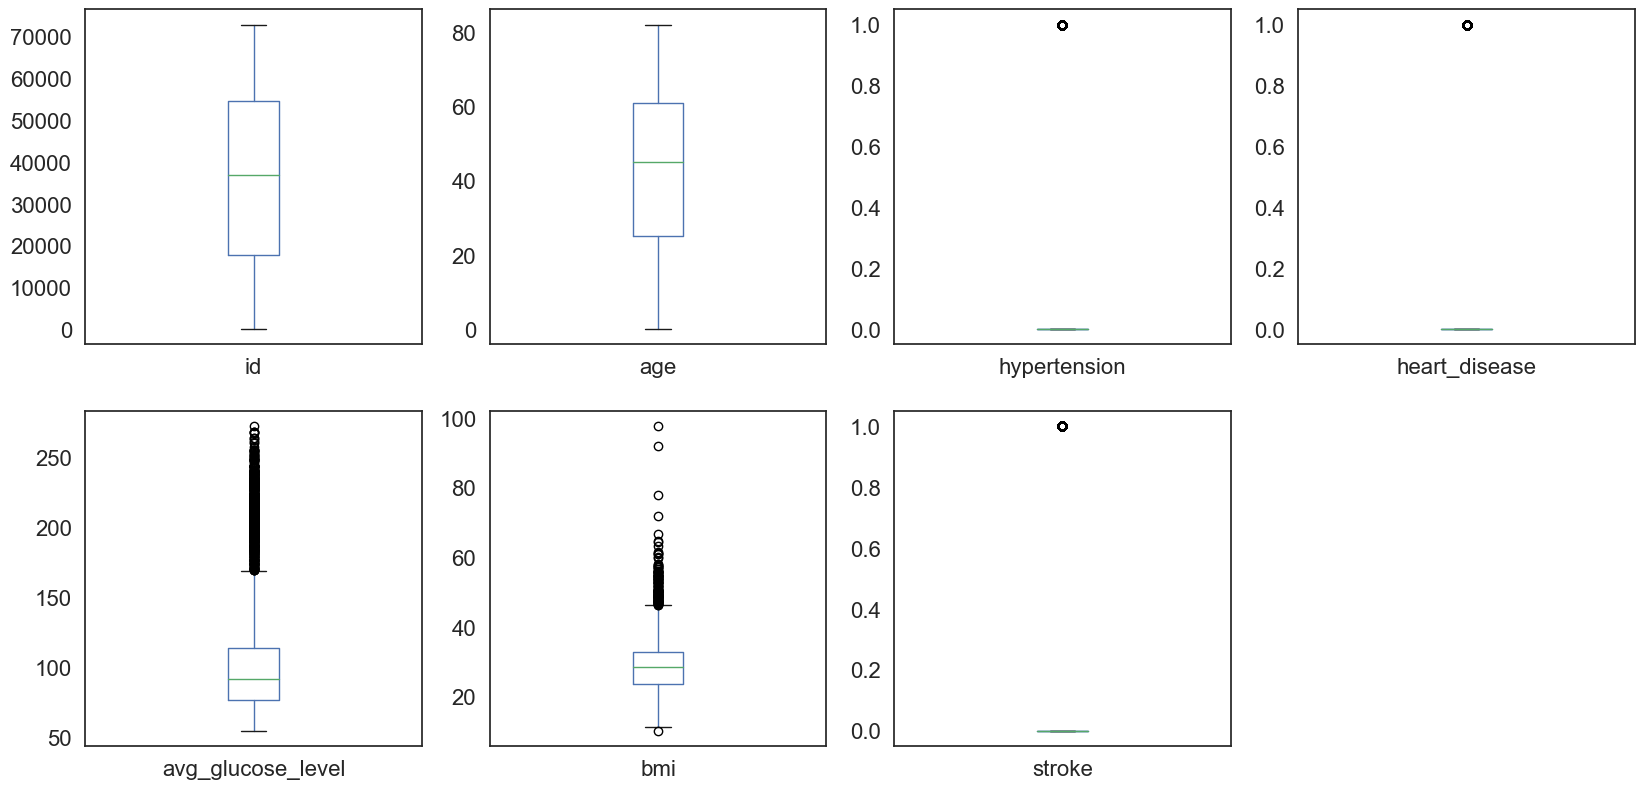

In [1353]:
df.plot(kind = "box", subplots=True, figsize=(20,20), layout=(4,4), fontsize=16)
plt.show()

In [1354]:
glu_outliers=df.loc[df['avg_glucose_level']>170]
glu_outliers['avg_glucose_level'].shape

(622,)

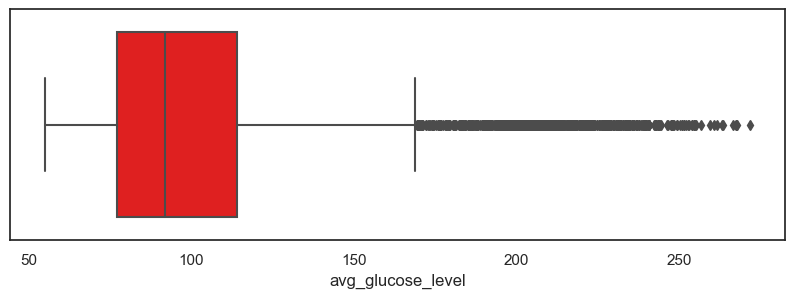

In [1355]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x=df["avg_glucose_level"],color='red');

In [1356]:
df.drop(glu_outliers.index, inplace = True)

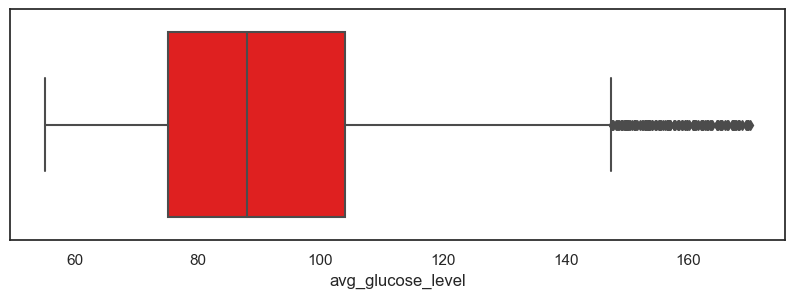

In [1357]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x=df["avg_glucose_level"],color='red');

In [1358]:
bmi_outliers=df.loc[df['bmi']>45]
bmi_outliers['bmi'].shape

(110,)

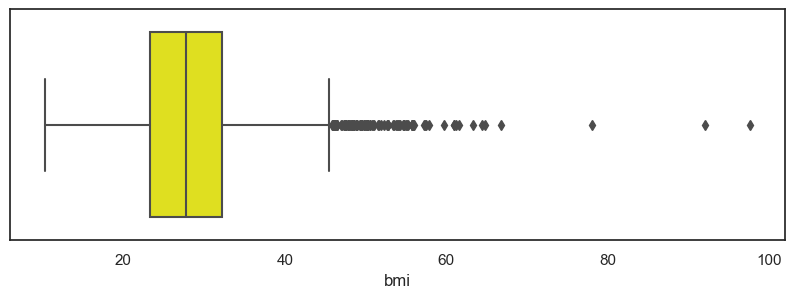

In [1359]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x=df["bmi"],color='yellow');

In [1360]:
df.drop(bmi_outliers.index, inplace = True)


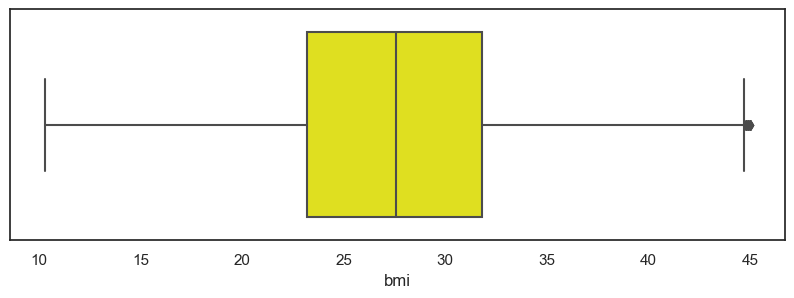

In [1361]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x=df["bmi"],color='yellow');

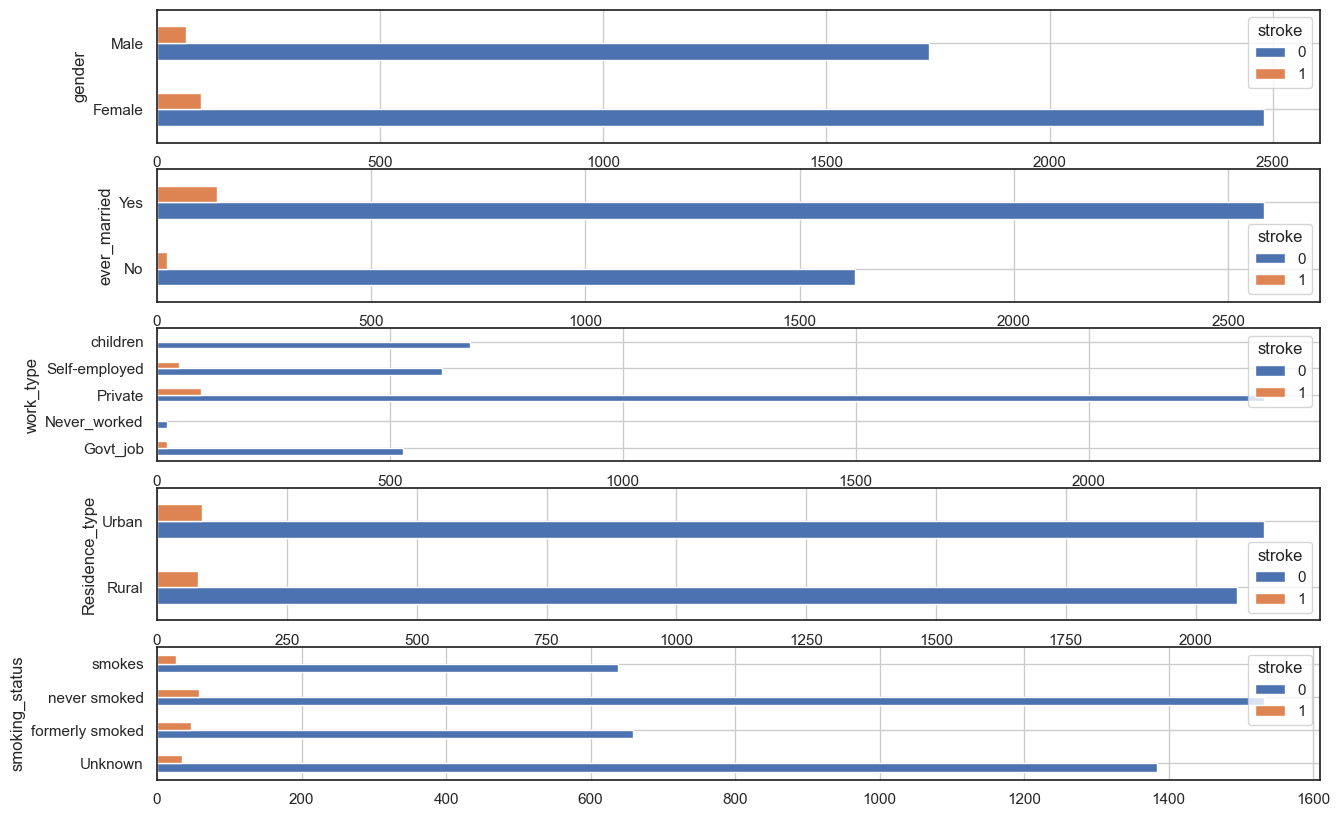

In [1362]:
objects = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
fig, axes = plt.subplots(len(objects), sharex = False, sharey = False, figsize = (15, 10))

for i in range(0, len(objects)):
    pd.crosstab(df[objects[i]], df[strk]).plot(kind = 'barh', stacked = False, grid = True, ax = axes[i])

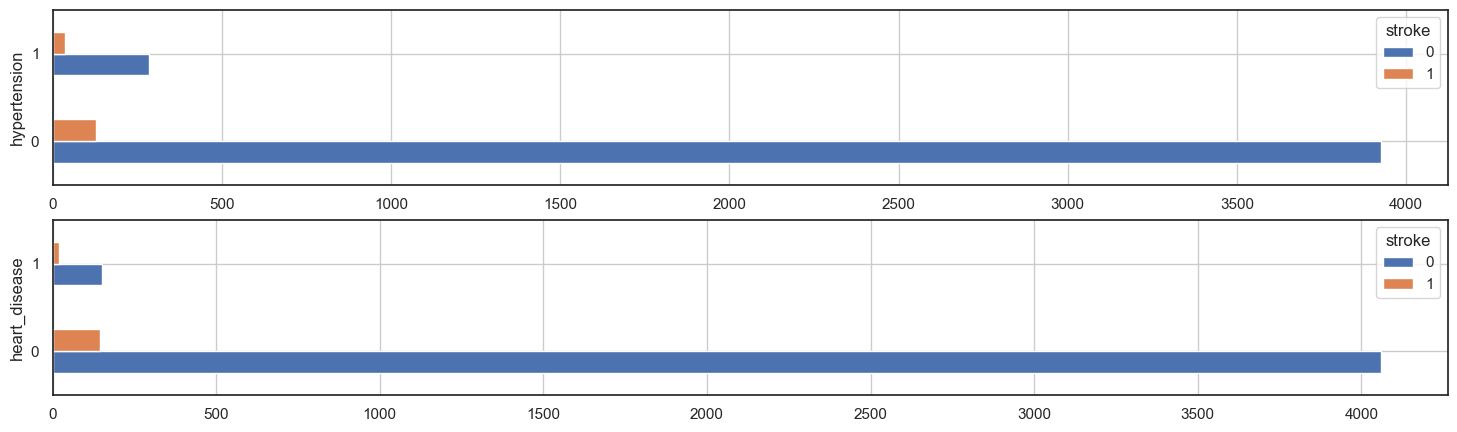

In [1363]:
numobjects = ['hypertension', 'heart_disease']
fig, axes = plt.subplots(len(numobjects), sharex = False, sharey = False, figsize = (18, 5))

for i in range(0, len(numobjects)):
    pd.crosstab(df[numobjects[i]], df[strk]).plot(kind = 'barh', stacked = False, grid = True, ax = axes[i])

In [1364]:
# stroke levels almost the same being either rural or urban residence type
df = df.drop(['Residence_type'], axis = 1)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.50000,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,70.09,27.40000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,94.39,22.80000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,76.15,28.89456,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,58.57,24.20000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,83.75,28.89456,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,125.20,40.00000,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,82.99,30.60000,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,166.29,25.60000,formerly smoked,0


In [1365]:
# removing id as it does not help in prediction of stroke
df = df.drop("id", axis = 1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,105.92,32.50000,never smoked,1
6,Male,74.0,1,1,Yes,Private,70.09,27.40000,never smoked,1
7,Female,69.0,0,0,No,Private,94.39,22.80000,never smoked,1
8,Female,59.0,0,0,Yes,Private,76.15,28.89456,Unknown,1
9,Female,78.0,0,0,Yes,Private,58.57,24.20000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,83.75,28.89456,never smoked,0
5105,Female,81.0,0,0,Yes,Self-employed,125.20,40.00000,never smoked,0
5106,Female,35.0,0,0,Yes,Self-employed,82.99,30.60000,never smoked,0
5107,Male,51.0,0,0,Yes,Private,166.29,25.60000,formerly smoked,0


In [1366]:
objs = ['gender', 'ever_married', 'work_type', 'smoking_status']

a = 0
for column in objs:
    row = df[column].nunique()
    if row > a:
        a = row


In [1367]:
for column in objs:
    numerical = pd.get_dummies(df[column], drop_first=True)
    df = pd.concat([df, numerical], axis = 1)
    df.drop(column, inplace=True, axis = 1)

df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Yes,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
2,80.0,0,1,105.92,32.50000,1,1,1,0,1,0,0,0,1,0
6,74.0,1,1,70.09,27.40000,1,1,1,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.80000,1,0,0,0,1,0,0,0,1,0
8,59.0,0,0,76.15,28.89456,1,0,1,0,1,0,0,0,0,0
9,78.0,0,0,58.57,24.20000,1,0,1,0,1,0,0,0,0,0


In [1368]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

<AxesSubplot:>

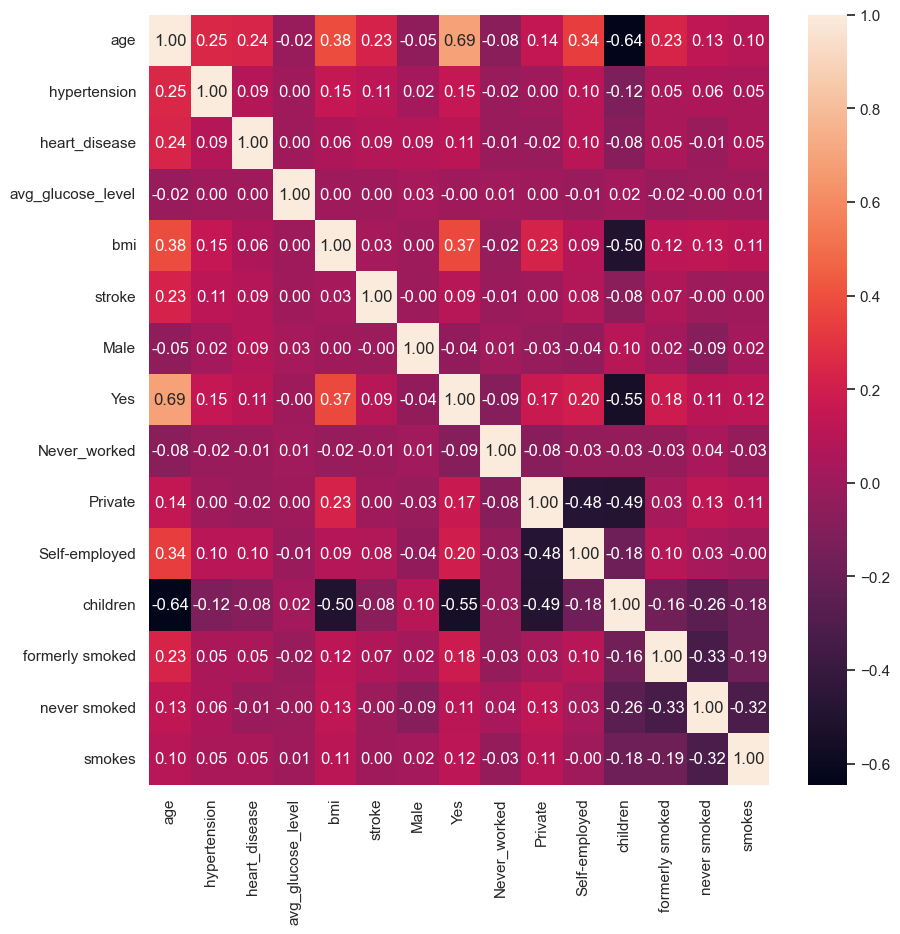

In [1391]:
plt.figure(figsize = (10, 10))
sns.heatmap(data=df.corr(), annot=True, fmt = '.2f')

In [1370]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Yes,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
2,80.0,0,1,105.92,32.50000,1,1,1,0,1,0,0,0,1,0
6,74.0,1,1,70.09,27.40000,1,1,1,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.80000,1,0,0,0,1,0,0,0,1,0
8,59.0,0,0,76.15,28.89456,1,0,1,0,1,0,0,0,0,0
9,78.0,0,0,58.57,24.20000,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,83.75,28.89456,0,0,1,0,1,0,0,0,1,0
5105,81.0,0,0,125.20,40.00000,0,0,1,0,0,1,0,0,1,0
5106,35.0,0,0,82.99,30.60000,0,0,1,0,0,1,0,0,1,0
5107,51.0,0,0,166.29,25.60000,0,1,1,0,1,0,0,1,0,0


In [1371]:
X = df.iloc[:,0:14].values
y = df.iloc[:,14].values

In [1372]:
X = pd.DataFrame(X)
X.head() 
#all features made numerical

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,80.0,0.0,1.0,105.92,32.50000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,74.0,1.0,1.0,70.09,27.40000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,69.0,0.0,0.0,94.39,22.80000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,59.0,0.0,0.0,76.15,28.89456,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,78.0,0.0,0.0,58.57,24.20000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1373]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [1374]:
X_train, X_test, y_train, y_test = ttsplit(X, y, test_size = 0.3, random_state = 42) 

print('Train Shape: ', X_train.shape)
print('Test Shape: ', X_test.shape)

Train Shape:  (3063, 14)
Test Shape:  (1314, 14)


In [1375]:
# helps balancing and removes any remaining outliers that were not removed
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [1376]:
#Logistic Regression

lr = LogisticRegression()
lr_train= lr.fit(X_train, y_train.values.ravel())
print("Logistic Regression Training Accuracy: ", lr_train.score(X_test, y_test) * 100, "%")

Logistic Regression Training Accuracy:  85.54033485540334 %


In [1377]:
#Random Search for Logistic Regression

rs = dict(C=np.logspace(0, 4, num=10), penalty=['l2'])
lgrs = RandomizedSearchCV(lr, rs)
lgrs.fit(X_train, y_train.values.ravel())

print("hyperparameters ",lgrs.best_params_)
print("percentage of accuracy :",lgrs.best_score_ * 100,"%")

hyperparameters  {'penalty': 'l2', 'C': 1.0}
percentage of accuracy : 85.60182963887023 %


In [1378]:
#Grid Search for Logistic Regression

gs={"C":np.logspace(-3,3,7), "penalty":["l2"]}
lggs=GridSearchCV(lr, gs, cv=5)
lggs.fit(X_train, y_train.values.ravel())

print("tuned hyperparameters :(best parameters) ",lggs.best_params_)
print("Accuracy :",lggs.best_score_ * 100, "%")

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
Accuracy : 86.05929266758363 %


In [1379]:
#Classification Report for Logistic Regression

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred, target_names = ["0", "1"]))
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1110
           1       0.62      0.17      0.27       204

    accuracy                           0.86      1314
   macro avg       0.75      0.58      0.59      1314
weighted avg       0.83      0.86      0.82      1314



In [1394]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC score for Logistic Regression: ", roc_auc_score(y_test, lr.predict((X_test) * 100), "%"))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

<AxesSubplot:>

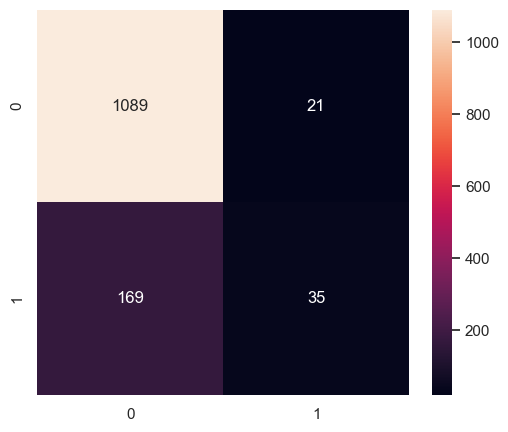

In [1381]:
#Confusion Matrix for Logistic Regression

y_pred = lr.predict(X_test)
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')


In [1382]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

print(gnb.fit(X_train, y_train.values.ravel()))

print("Training Accuracy: ",gnb.score(X_train, y_train) * 100, "%")

GaussianNB()
Training Accuracy:  81.78256611165524 %


In [1383]:
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred, target_names = ["0", "1"]))
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1110
           1       0.46      1.00      0.63       204

    accuracy                           0.82      1314
   macro avg       0.73      0.89      0.75      1314
weighted avg       0.92      0.82      0.84      1314



In [1384]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC score for Naive Bayes: ", roc_auc_score(y_test, gnb.predict(X_test)) * 100, "%")

ROC-AUC score for Naive Bayes:  89.05405405405405 %


<AxesSubplot:>

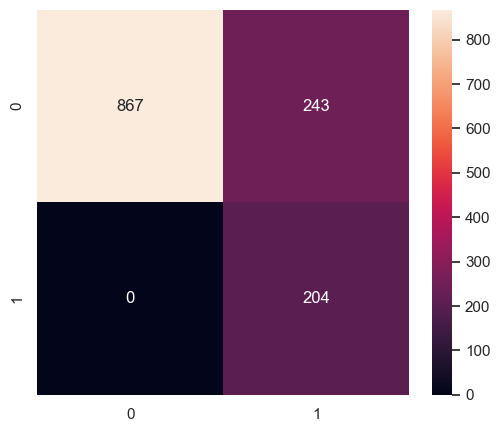

In [1385]:
#Confusion Matrix for Naive Bayes

y_pred = gnb.predict(X_test)
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')

In [1386]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

print(knn.fit(X_train, y_train.values.ravel()))
print("K Nearest Neighbour Accuracy: ",knn.score(X_train, y_train) * 100, "%")



KNeighborsClassifier(n_neighbors=3)
K Nearest Neighbour Accuracy:  92.45837414299706 %


In [1387]:
#Grid Search for KNN

knn_range = list(range(1, 40))
parameters_grid = dict(n_neighbors=knn_range)

grid = GridSearchCV(knn, parameters_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

grid_search=grid.fit(X_train, y_train.values.ravel())
print("Grid Search Score for KNN: ", grid.best_score_ * 100, "%")

Fitting 5 folds for each of 39 candidates, totalling 195 fits
Grid Search Score for KNN:  85.92894689142649 %


In [1388]:
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred, target_names = ["0", "1"]))
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1110
           1       0.50      0.47      0.48       204

    accuracy                           0.84      1314
   macro avg       0.70      0.69      0.70      1314
weighted avg       0.84      0.84      0.84      1314



In [1389]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
print("ROC-AUC score for KNN: ", roc_auc_score(y_test, knn.predict(X_test)) * 100, "%")

ROC-AUC score for KNN:  69.20508744038156 %


<AxesSubplot:>

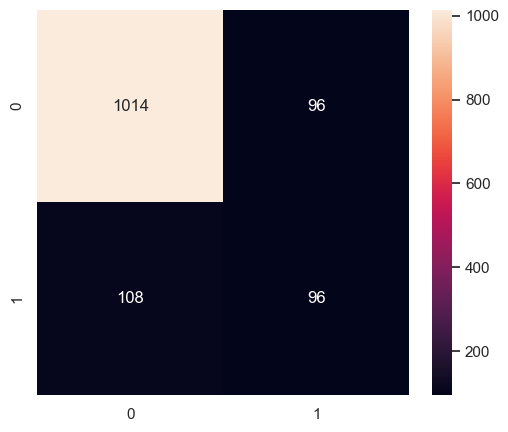

In [1390]:
#Confusion Matrix for KNN

y_pred = knn.predict(X_test)
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')